<a href="https://colab.research.google.com/github/melikee-b/PsyDrugML/blob/main/drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphaneleri yükle
import pandas as pd

# Colab'e dosya yüklemek için
from google.colab import files

df = pd.read_csv("drug_consumption.csv")



,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [ ]:
df.columns = [
    "ID", "Yaş", "Cinsiyet", "Eğitim", "Ülke", "Etnik_Köken",
    "Nevrotiklik", "Dışadönüklük", "Deneyime_Açıklık", "Uyumluluk", "Sorumluluk",
    "Dürtüsellik", "Duyum_Arayışı",
    "Alkol", "Amfetamin", "Amil_Nitrit", "Benzodiazepin", "Esrar", "Çikolata",
    "Kokain", "Kafein", "Krack", "Ekstazi", "Eroin", "Ketamin", "Yasal_Ürünler",
    "LSD", "Metadon", "Mantar", "Nikotin", "Uçucu_Madde", "Semeron"

]


In [ ]:
# Tüm sütunlardaki eksik değer sayısını göster
df.isnull().sum()

,0
ID,0
Yaş,0
Cinsiyet,0
Eğitim,0
Ülke,0
Etnik_Köken,0
Nevrotiklik,0
Dışadönüklük,0
Deneyime_Açıklık,0
Uyumluluk,0


In [ ]:

etiket_map = {
    'CL0': 'Hiç_Kullanmadı',
    'CL1': '10_Yıldan_Fazla',
    'CL2': 'Son_10_Yıl',
    'CL3': 'Son_1_Yıl',
    'CL4': 'Son_1_Ay',
    'CL5': 'Son_1_Hafta',
    'CL6': 'Dün'
}

sayisal_map = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6
}

# Madde adları (Türkçe karşılıklarıyla)
madde_sutunlari = [
    "Alkol", "Amfetamin", "Amil_Nitrit", "Benzodiazepin", "Esrar", "Çikolata",
    "Kokain", "Kafein", "Krack", "Ekstazi", "Eroin", "Ketamin", "Yasal_Ürünler",
    "LSD", "Metadon", "Mantar", "Nikotin", "Uçucu_Madde", "Semeron"
]

madde_etiket_sutunlari = [
    "Alkol_etiket", "Amfetamin_etiket", "Amil_Nitrit_etiket", "Benzodiazepin_etiket",
    "Esrar_etiket", "Çikolata_etiket", "Kokain_etiket", "Kafein_etiket", "Krack_etiket",
    "Ekstazi_etiket", "Eroin_etiket", "Ketamin_etiket", "Yasal_Ürünler_etiket",
    "LSD_etiket", "Metadon_etiket", "Mantar_etiket", "Nikotin_etiket", "Uçucu_Madde_etiket",
    "Semeron_etiket"
]

# Haritalamayı uygula
for col in madde_sutunlari:
    df[f"{col}_etiket"] = df[col].map(etiket_map)
    df[f"{col}_skor"] = df[col].map(sayisal_map)
df.head(5)

,ID,Yaş,Cinsiyet,Eğitim,Ülke,Etnik_Köken,Nevrotiklik,Dışadönüklük,Deneyime_Açıklık,Uyumluluk,...,Metadon_etiket,Metadon_skor,Mantar_etiket,Mantar_skor,Nikotin_etiket,Nikotin_skor,Uçucu_Madde_etiket,Uçucu_Madde_skor,Semeron_etiket,Semeron_skor
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,Son_1_Yıl,3,Hiç_Kullanmadı,0,Son_1_Ay,4,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,Hiç_Kullanmadı,0,10_Yıldan_Fazla,1,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0,Son_10_Yıl,2,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,Hiç_Kullanmadı,0,Son_10_Yıl,2,Son_10_Yıl,2,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0,Dün,6,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0


In [ ]:
kategorik_sutunlar = ["Cinsiyet", "Eğitim", "Ülke", "Etnik_Köken"]

for col in kategorik_sutunlar:
    print(f"{col} → Benzersiz Değerler: {df[col].unique()}")


Cinsiyet → Benzersiz Değerler: [-0.48246  0.48246]
Eğitim → Benzersiz Değerler: [ 1.98437 -0.05921  1.16365 -1.22751 -1.7379   0.45468 -0.61113 -2.43591
 -1.43719]
Ülke → Benzersiz Değerler: [ 0.96082  0.24923 -0.57009 -0.28519 -0.09765  0.21128 -0.46841]
Etnik_Köken → Benzersiz Değerler: [-0.31685  0.1144  -0.22166 -0.50212  0.126   -1.10702  1.90725]


In [ ]:
df["Cinsiyet_kod"] = df["Cinsiyet"].apply(lambda x: 0 if x < 0 else 1)

df.head(5)

,ID,Yaş,Cinsiyet,Eğitim,Ülke,Etnik_Köken,Nevrotiklik,Dışadönüklük,Deneyime_Açıklık,Uyumluluk,...,Metadon_skor,Mantar_etiket,Mantar_skor,Nikotin_etiket,Nikotin_skor,Uçucu_Madde_etiket,Uçucu_Madde_skor,Semeron_etiket,Semeron_skor,Cinsiyet_kod
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,3,Hiç_Kullanmadı,0,Son_1_Ay,4,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0,0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,10_Yıldan_Fazla,1,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0,0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,Hiç_Kullanmadı,0,Son_10_Yıl,2,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0,1
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,Son_10_Yıl,2,Son_10_Yıl,2,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0,1
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,0,Hiç_Kullanmadı,0,Dün,6,Hiç_Kullanmadı,0,Hiç_Kullanmadı,0,1


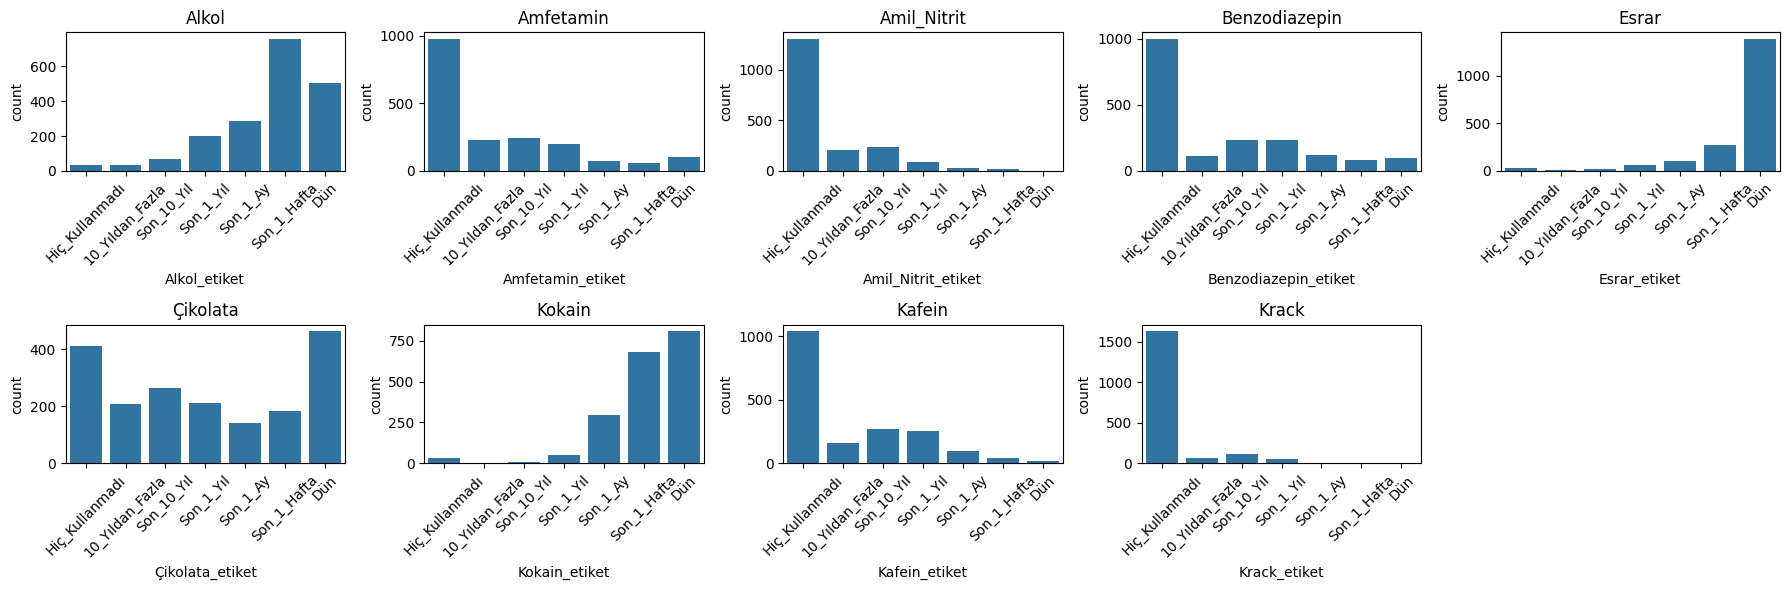

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

madde_etiket_sutunlari = [col for col in df.columns if col.endswith("_etiket")]

for i, col in enumerate(madde_etiket_sutunlari[:9]):  # İlk 9 madde
    plt.subplot(2, 5, i+1)
    sns.countplot(data=df, x=col, order=[
        'Hiç_Kullanmadı', '10_Yıldan_Fazla', 'Son_10_Yıl',
        'Son_1_Yıl', 'Son_1_Ay', 'Son_1_Hafta', 'Dün'
    ])
    plt.xticks(rotation=45)
    plt.title(col.replace("_etiket", ""))

plt.tight_layout()
plt.show()


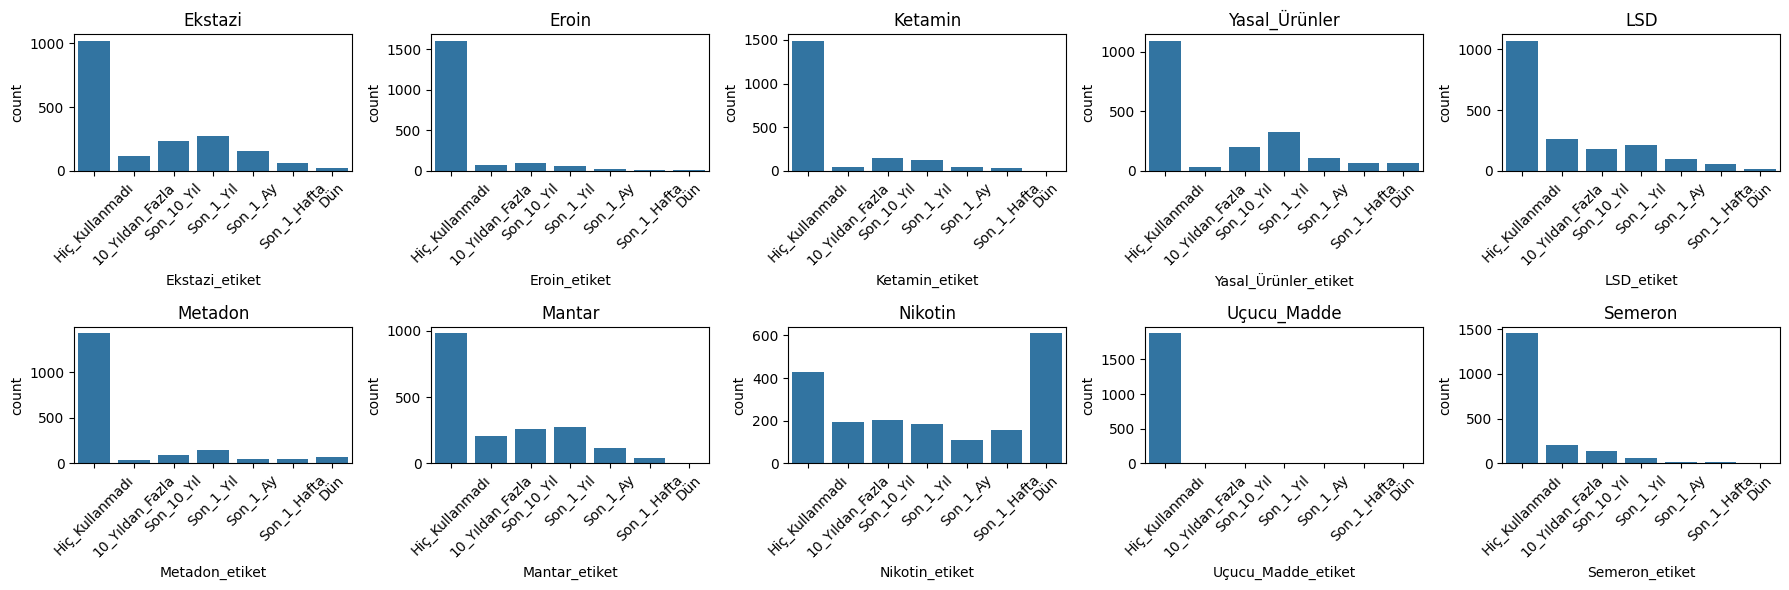

In [ ]:
plt.figure(figsize=(18, 6))

for i, col in enumerate(madde_etiket_sutunlari[9:]):
    plt.subplot(2, 5, i+1)
    sns.countplot(data=df, x=col, order=[
        'Hiç_Kullanmadı', '10_Yıldan_Fazla', 'Son_10_Yıl',
        'Son_1_Yıl', 'Son_1_Ay', 'Son_1_Hafta', 'Dün'
    ])
    plt.xticks(rotation=45)
    plt.title(col.replace("_etiket", ""))

plt.tight_layout()
plt.show()


In [ ]:
# Kullanıcı = 1 (CL1–CL6), Kullanıcı değil = 0 (CL0)
madde_binary_sutunlari = []

for col in madde_sutunlari:
    binary_col = f"{col}_binary"
    df[binary_col] = df[col].apply(lambda x: 0 if x == "CL0" else 1)
    madde_binary_sutunlari.append(binary_col)
df.head(5)

,ID,Yaş,Cinsiyet,Eğitim,Ülke,Etnik_Köken,Nevrotiklik,Dışadönüklük,Deneyime_Açıklık,Uyumluluk,...,Ekstazi_binary,Eroin_binary,Ketamin_binary,Yasal_Ürünler_binary,LSD_binary,Metadon_binary,Mantar_binary,Nikotin_binary,Uçucu_Madde_binary,Semeron_binary
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,1,1,0,0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Giriş özellikleri (X): Sayısal psikolojik ve demografik özellikler
X = df[[
    "Yaş", "Cinsiyet_kod", "Eğitim", "Ülke", "Etnik_Köken",
    "Nevrotiklik", "Dışadönüklük", "Deneyime_Açıklık", "Uyumluluk", "Sorumluluk",
    "Dürtüsellik", "Duyum_Arayışı"
]]

# Hedefler (Y): 18 maddenin binary halleri
Y = df[madde_binary_sutunlari]
df.head(5)

,ID,Yaş,Cinsiyet,Eğitim,Ülke,Etnik_Köken,Nevrotiklik,Dışadönüklük,Deneyime_Açıklık,Uyumluluk,...,Ekstazi_binary,Eroin_binary,Ketamin_binary,Yasal_Ürünler_binary,LSD_binary,Metadon_binary,Mantar_binary,Nikotin_binary,Uçucu_Madde_binary,Semeron_binary
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,1,1,0,0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Veriyi eğitim/test olarak ayır
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model tanımı
rf = RandomForestClassifier(random_state=42)
multi_rf = MultiOutputClassifier(rf)

# Eğit
multi_rf.fit(X_train, Y_train)

# Tahmin
Y_pred = multi_rf.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Sonuçları saklamak için
results = {}

for col in Y_train.columns:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, Y_train[col])

    # Tek hedef Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_res, y_res)

    # Tahmin
    y_pred = rf.predict(X_test)

    # Rapor
    report = classification_report(Y_test[col], y_pred, output_dict=True, zero_division=0)

    results[col] = report

# Örnek bir madde için raporu göster
print(results["Esrar_binary"])


{'0': {'precision': 1.0, 'recall': 0.16666666666666666, 'f1-score': 0.2857142857142857, 'support': 6.0}, '1': {'precision': 0.9867021276595744, 'recall': 1.0, 'f1-score': 0.9933065595716198, 'support': 371.0}, 'accuracy': 0.986737400530504, 'macro avg': {'precision': 0.9933510638297872, 'recall': 0.5833333333333334, 'f1-score': 0.6395104226429528, 'support': 377.0}, 'weighted avg': {'precision': 0.9869137648851515, 'recall': 0.986737400530504, 'f1-score': 0.982045144072564, 'support': 377.0}}


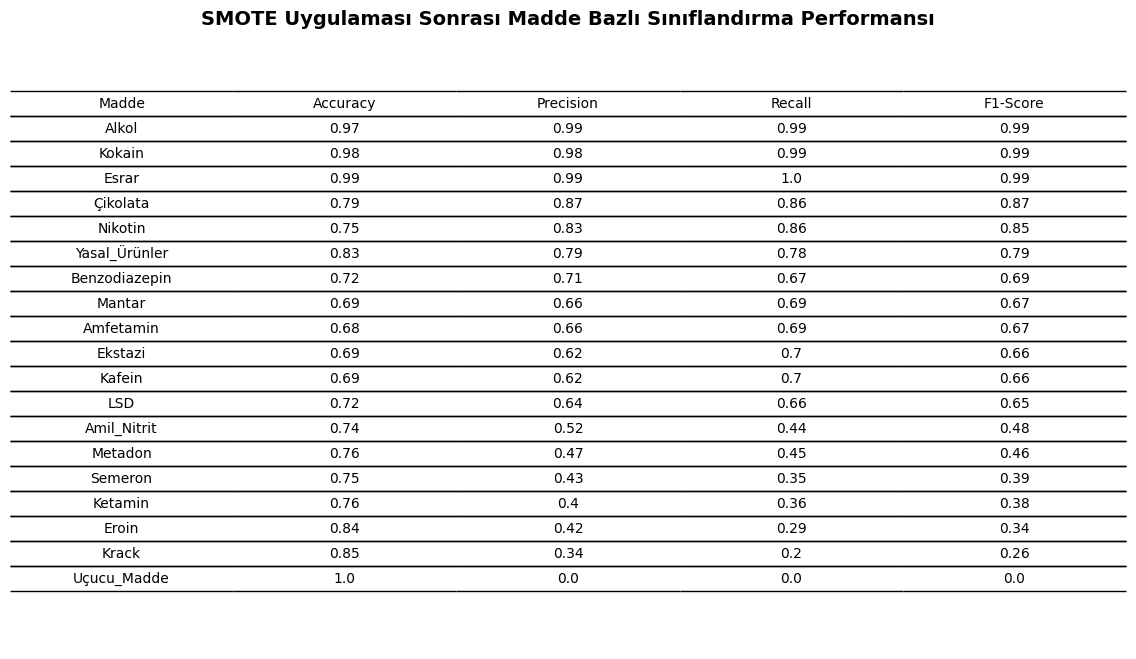

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Performans metriklerini tutacak liste
performance_smote = []

for col in Y_train.columns:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, Y_train[col])

    # Model eğit
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_res, y_res)

    # Test tahmin
    y_pred = rf.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(Y_test[col], y_pred)
    prec = precision_score(Y_test[col], y_pred, zero_division=0)
    rec = recall_score(Y_test[col], y_pred, zero_division=0)
    f1 = f1_score(Y_test[col], y_pred, zero_division=0)

    performance_smote.append([
        col.replace("_binary", ""),  # madde adı
        round(acc, 2),
        round(prec, 2),
        round(rec, 2),
        round(f1, 2)
    ])

# DataFrame'e çevir
df_smote_perf = pd.DataFrame(performance_smote, columns=["Madde", "Accuracy", "Precision", "Recall", "F1-Score"])

# F1-Score'a göre sırala
df_smote_perf = df_smote_perf.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Sonuçları çizgili ve şık bir tabloyla göster
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_smote_perf.values,
                 colLabels=df_smote_perf.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=["#f2f2f2"] * len(df_smote_perf.columns),
                 edges='horizontal')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.title("SMOTE Uygulaması Sonrası Madde Bazlı Sınıflandırma Performansı", fontsize=14, weight='bold')
plt.show()


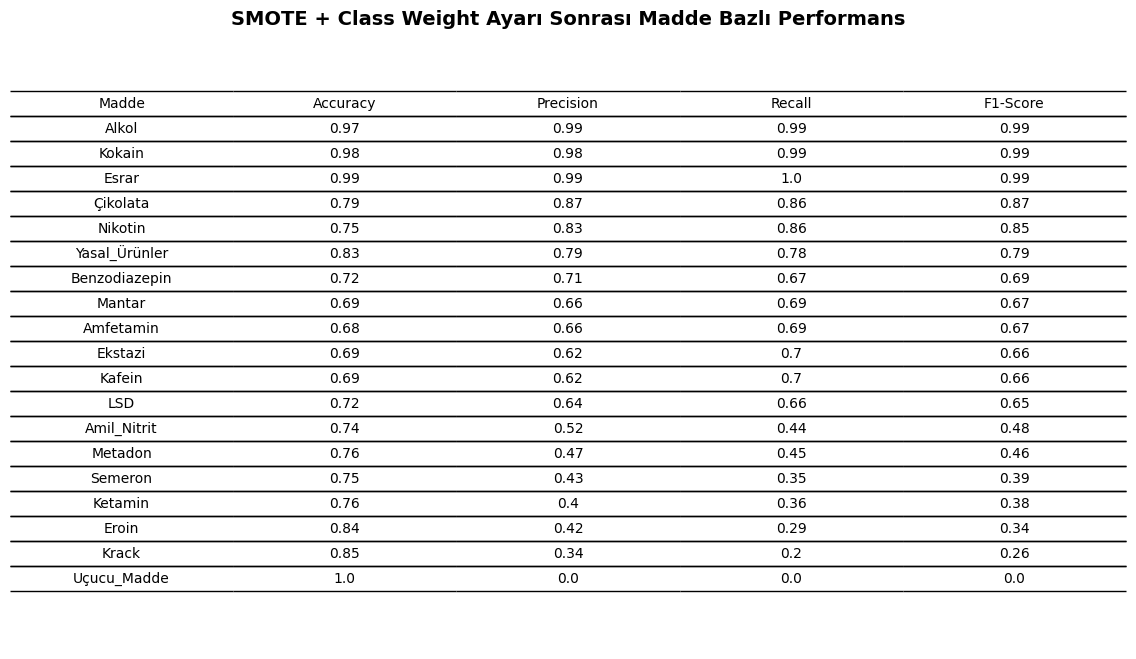

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Performans metriklerini tutacak liste
performance_smote_cw = []

for col in Y_train.columns:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, Y_train[col])

    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf.fit(X_res, y_res)

    # Test tahmin
    y_pred = rf.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(Y_test[col], y_pred)
    prec = precision_score(Y_test[col], y_pred, zero_division=0)
    rec = recall_score(Y_test[col], y_pred, zero_division=0)
    f1 = f1_score(Y_test[col], y_pred, zero_division=0)

    performance_smote_cw.append([
        col.replace("_binary", ""),  # madde adı
        round(acc, 2),
        round(prec, 2),
        round(rec, 2),
        round(f1, 2)
    ])

# DataFrame’e çevir
df_cw_perf = pd.DataFrame(performance_smote_cw, columns=["Madde", "Accuracy", "Precision", "Recall", "F1-Score"])

# F1-Score’a göre sırala
df_cw_perf = df_cw_perf.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Sonuçları çizgili tabloyla görselleştir
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_cw_perf.values,
                 colLabels=df_cw_perf.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=["#f2f2f2"] * len(df_cw_perf.columns),
                 edges='horizontal')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.title("SMOTE + Class Weight Ayarı Sonrası Madde Bazlı Performans", fontsize=14, weight='bold')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Toplam metrik listeleri
acc_list = []
prec_list = []
rec_list = []
f1_list = []

for col in Y_train.columns:
    # SMOTE ile veriyi dengele
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, Y_train[col])

    # RandomForest class_weight=’balanced’
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf.fit(X_res, y_res)

    # Test tahmin
    y_pred = rf.predict(X_test)

    # Metrikleri listele
    acc_list.append(accuracy_score(Y_test[col], y_pred))
    prec_list.append(precision_score(Y_test[col], y_pred, zero_division=0))
    rec_list.append(recall_score(Y_test[col], y_pred, zero_division=0))
    f1_list.append(f1_score(Y_test[col], y_pred, zero_division=0))

# Ortalama metrikleri hesapla
avg_acc = sum(acc_list) / len(acc_list)
avg_prec = sum(prec_list) / len(prec_list)
avg_rec = sum(rec_list) / len(rec_list)
avg_f1 = sum(f1_list) / len(f1_list)

print("📊 SMOTE + Class Weight Ayarı Sonrası Ortalama Metrikler")
print(f"Accuracy (ortalama): {avg_acc:.4f}")
print(f"Precision (ortalama): {avg_prec:.4f}")
print(f"Recall (ortalama): {avg_rec:.4f}")
print(f"F1-Score (ortalama): {avg_f1:.4f}")


📊 SMOTE + Class Weight Ayarı Sonrası Ortalama Metrikler
Accuracy (ortalama): 0.7994
Precision (ortalama): 0.6298
Recall (ortalama): 0.6141
F1-Score (ortalama): 0.6195


In [ ]:
for i, col in enumerate(Y.columns):
    print(f"\n📌 Madde: {col.replace('_binary', '')}")
    print(classification_report(Y_test.iloc[:, i], Y_pred[:, i]))



📌 Madde: Alkol
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.98      1.00      0.99       371

    accuracy                           0.98       377
   macro avg       0.49      0.50      0.50       377
weighted avg       0.97      0.98      0.98       377


📌 Madde: Amfetamin
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       196
           1       0.67      0.67      0.67       181

    accuracy                           0.69       377
   macro avg       0.69      0.69      0.69       377
weighted avg       0.69      0.69      0.69       377


📌 Madde: Amil_Nitrit
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       274
           1       0.61      0.34      0.44       103

    accuracy                           0.76       377
   macro avg       0.70      0.63      0.64       377
weighted avg    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

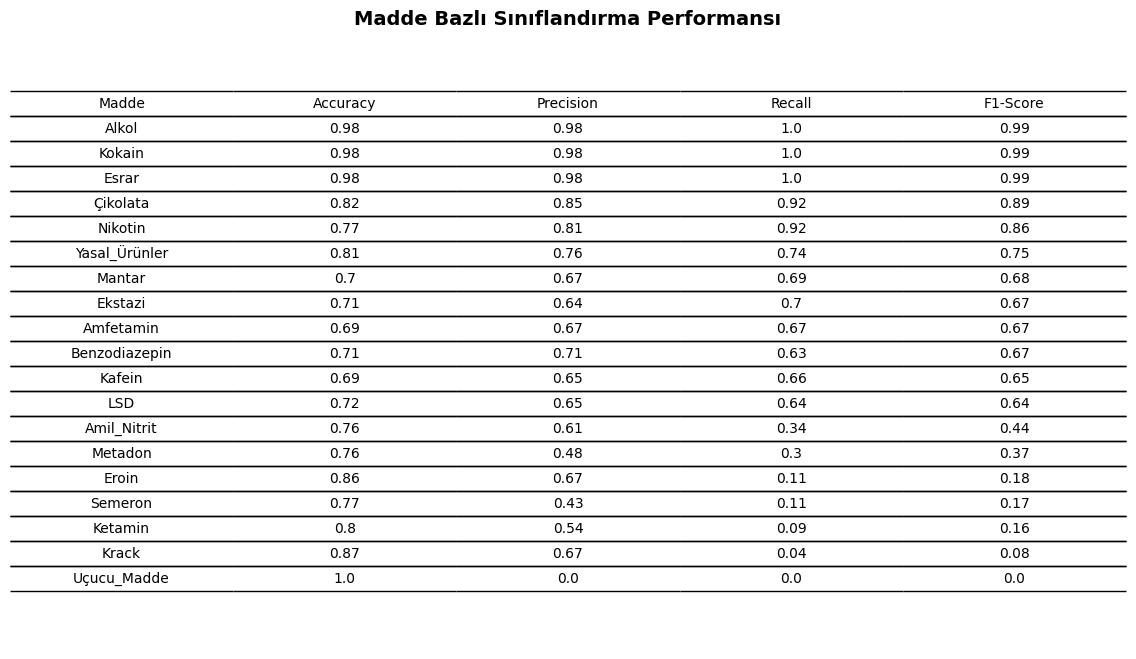

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Boş liste başlat
performance = []

# Her bir hedef sütun için metrikleri hesapla
for i, col in enumerate(Y_test.columns):
    y_true = Y_test.iloc[:, i]
    y_pred = Y_pred[:, i]

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    performance.append([
        col.replace("_binary", ""),  # madde adı
        round(acc, 2),
        round(prec, 2),
        round(rec, 2),
        round(f1, 2)
    ])

# DataFrame'e dönüştür
df_table = pd.DataFrame(performance, columns=["Madde", "Accuracy", "Precision", "Recall", "F1-Score"])

# F1-Score'a göre sırala
df_table = df_table.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Çizgili görselli tabloyu oluştur
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_table.values,
                 colLabels=df_table.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=["#f2f2f2"] * len(df_table.columns),
                 edges='horizontal')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.title("Madde Bazlı Sınıflandırma Performansı", fontsize=14, weight='bold')
plt.show()


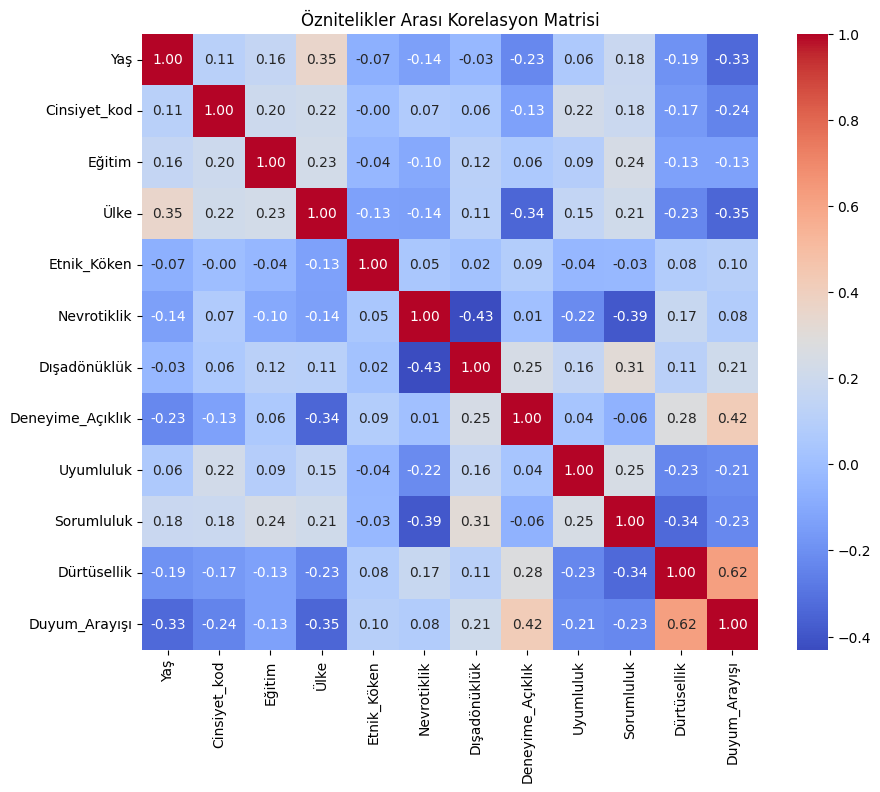

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal değişkenleri al (etiket, skor, binary vs. hariç)
sayisal_sutunlar = [
    "Yaş", "Cinsiyet_kod", "Eğitim", "Ülke", "Etnik_Köken",
    "Nevrotiklik", "Dışadönüklük", "Deneyime_Açıklık",
    "Uyumluluk", "Sorumluluk", "Dürtüsellik", "Duyum_Arayışı"
]

plt.figure(figsize=(10, 8))
corr = df[sayisal_sutunlar].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Öznitelikler Arası Korelasyon Matrisi")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score

def evaluate_rf(criterion_type):
    rf = RandomForestClassifier(criterion=criterion_type, random_state=42)
    multi_rf = MultiOutputClassifier(rf)
    multi_rf.fit(X_train, Y_train)
    Y_pred_alt = multi_rf.predict(X_test)

    f1_scores = []
    for i in range(Y_test.shape[1]):
        f1 = f1_score(Y_test.iloc[:, i], Y_pred_alt[:, i], zero_division=0)
        f1_scores.append(f1)

    avg_f1 = sum(f1_scores) / len(f1_scores)
    return round(avg_f1, 4)

f1_gini = evaluate_rf("gini")
f1_entropy = evaluate_rf("entropy")

print(f"📌 Ortalama F1-Score (Gini): {f1_gini}")
print(f"📌 Ortalama F1-Score (Entropy): {f1_entropy}")


📌 Ortalama F1-Score (Gini): 0.5717
📌 Ortalama F1-Score (Entropy): 0.5719


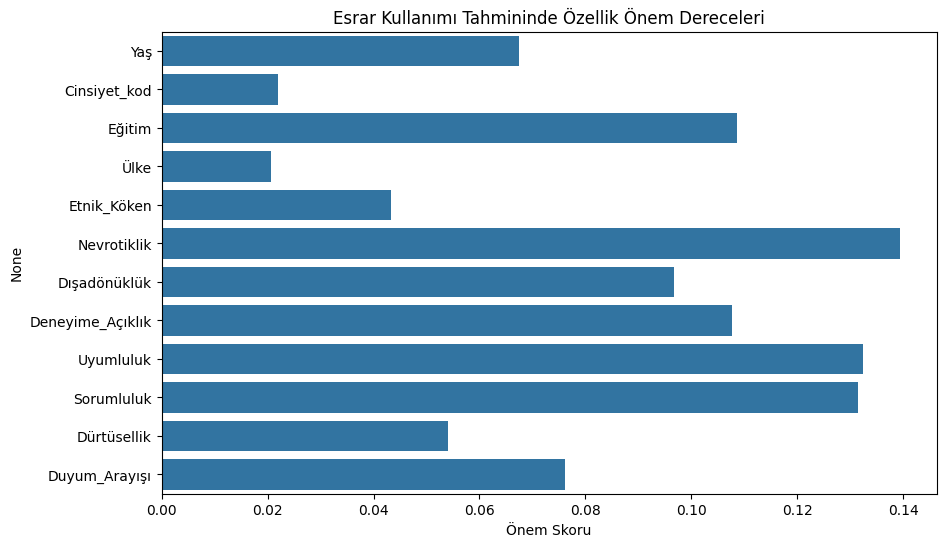

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train["Esrar_binary"])

importances = rf.feature_importances_
feature_names = X.columns

# Görsel
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Esrar Kullanımı Tahmininde Özellik Önem Dereceleri")
plt.xlabel("Önem Skoru")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Toplam metrik listeleri
acc_list = []
prec_list = []
rec_list = []
f1_list = []

for i in range(Y_test.shape[1]):
    y_true = Y_test.iloc[:, i]
    y_pred_i = Y_pred[:, i]

    acc_list.append(accuracy_score(y_true, y_pred_i))
    prec_list.append(precision_score(y_true, y_pred_i, zero_division=0))
    rec_list.append(recall_score(y_true, y_pred_i, zero_division=0))
    f1_list.append(f1_score(y_true, y_pred_i, zero_division=0))

# Ortalama metrikleri hesapla
print("📊 GENEL ORTALAMA METRİKLER (18 Madde İçin)")
print(f"Accuracy (ortalama): {sum(acc_list)/len(acc_list):.4f}")
print(f"Precision (ortalama): {sum(prec_list)/len(prec_list):.4f}")
print(f"Recall (ortalama): {sum(rec_list)/len(rec_list):.4f}")
print(f"F1-Score (ortalama): {sum(f1_list)/len(f1_list):.4f}")


📊 GENEL ORTALAMA METRİKLER (18 Madde İçin)
Accuracy (ortalama): 0.8100
Precision (ortalama): 0.6725
Recall (ortalama): 0.5554
F1-Score (ortalama): 0.5717
